In [ ]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:\\Users\\ivanc\\PycharmProjects\\scientificProject',

)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(101, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=16, validation_data=test_dataset)

Epoch 1/16
77/77 [==============================] - 23s 64ms/step - loss: 5.0142 - accuracy: 0.0339 - val_loss: 4.4194 - val_accuracy: 0.0474
Epoch 2/16
77/77 [==============================] - 4s 50ms/step - loss: 3.8896 - accuracy: 0.1650 - val_loss: 3.9212 - val_accuracy: 0.1961
Epoch 3/16
77/77 [==============================] - 5s 49ms/step - loss: 1.7381 - accuracy: 0.6205 - val_loss: 4.4887 - val_accuracy: 0.2206
Epoch 4/16
77/77 [==============================] - 4s 46ms/step - loss: 0.3580 - accuracy: 0.9261 - val_loss: 6.1076 - val_accuracy: 0.1944
Epoch 5/16
77/77 [==============================] - 5s 60ms/step - loss: 0.0908 - accuracy: 0.9845 - val_loss: 6.3935 - val_accuracy: 0.1993
Epoch 6/16
77/77 [==============================] - 4s 48ms/step - loss: 0.0235 - accuracy: 0.9967 - val_loss: 6.9955 - val_accuracy: 0.2386
Epoch 7/16
77/77 [==============================] - 5s 55ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 8.0632 - val_accuracy: 0.2173
Epoch 8/16
7

In [ ]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 18878921


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 0s 20ms/step - loss: 8.9493 - accuracy: 0.1895
Accuracy on the test set: 18.95%


1/1 [==============================] - 0s 94ms/step


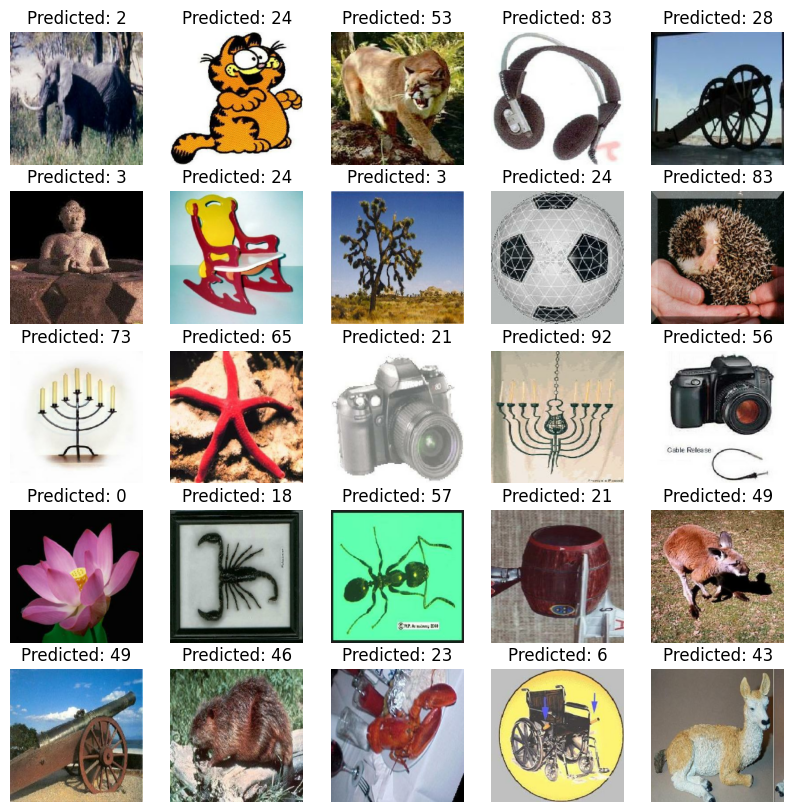

In [ ]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(10, 10))
for i in range( min (25,len (misclassified_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 177ms/step


IndexError: ignored

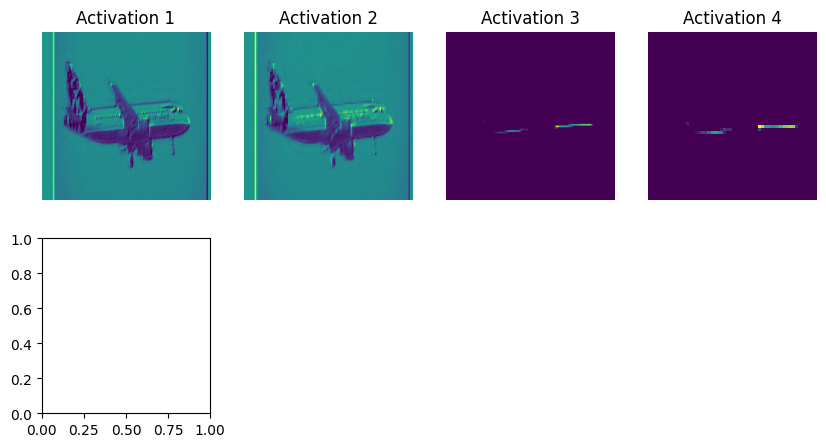

In [ ]:
sample_image, _ = next(iter(test_dataset))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    plt.subplot(2, 4, i+1)
    plt.imshow(activation[0, :, :, 0], cmap='viridis')
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.show()